In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import preprocessing

In [2]:
# read traning data
df = pd.read_csv("training_data.csv", low_memory=False)

In [3]:
vehicles = [v[:3] for v in df['Vehicle_Make_Description'].values]
vehicles = pd.DataFrame(data = vehicles)
df['Vehicle_Make_Description'] = vehicles
df

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CAD,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PON,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MER,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MER,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,381713000,Standard,6,Direct Billed to Insured,Pre-paid,N,42851,35,1999,PON,...,NaN,2006,Y,Y,162.55,0,0.0,0.0,0.0,0.0
424427,381735600,Standard,6,Direct Billed to Insured,Pre-paid,N,43669,31,2000,NSS,...,100-200,2006,Y,Y,117.13,0,0.0,0.0,0.0,0.0
424428,382057400,Standard,6,Direct Billed to Insured,Installment,N,42487,35,1997,PON,...,100-400,2006,N,Y,118.21,0,0.0,0.0,0.0,0.0
424429,382162500,Preferred,6,Direct Billed to Insured,Installment,N,43360,31,1998,PON,...,40-100,2006,N,Y,103.93,0,0.0,0.0,0.0,0.0


,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Policy_Tenure,EEA_Agency_Type,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Premium,Loss
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUI,...,22.7,Standard,N,Y,100-400,2006,Y,N,320.12,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CAD,...,47.1,Preferred,N,Y,100-200,2006,Y,N,259.70,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PON,...,47.2,Non-standard,N,Y,100-400,2006,Y,N,613.74,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MER,...,46.7,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MER,...,47.2,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,381713000,Standard,6,Direct Billed to Insured,Pre-paid,N,42851,35,1999,PON,...,0.0,Preferred,N,Y,NaN,2006,Y,Y,162.55,0.0
424427,381735600,Standard,6,Direct Billed to Insured,Pre-paid,N,43669,31,2000,NSS,...,0.0,Hybrid,Y,N,100-200,2006,Y,Y,117.13,0.0
424428,382057400,Standard,6,Direct Billed to Insured,Installment,N,42487,35,1997,PON,...,0.0,Preferred,N,Y,100-400,2006,N,Y,118.21,0.0
424429,382162500,Preferred,6,Direct Billed to Insured,Installment,N,43360,31,1998,PON,...,0.0,Non-standard,N,N,40-100,2006,N,Y,103.93,0.0


In [5]:
# for dt in df.dtypes:
#     print(dt.type, dt.type in [np.int64, np.float64])
target.mean()

235.42923860415473

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import copy

def drop_unknown(df):
    for i, col in enumerate(df.columns):
        if df.dtypes[i].type in [np.int64, np.float64]:
            df = df[pd.notnull(df[col])]
    return df.dropna()

def label_encode(df):
    le = preprocessing.LabelEncoder()
    for col in df.columns:
        col = str(col)
        if str(df.loc[:,col].dtype) == 'object':
            le.fit(df.loc[:,col]) 
            df.loc[:,col] = le.transform(df.loc[:,col])
    return df

def clean_data(df, missing_handler=drop_unknown, data_encoder=label_encode):
    df = missing_handler(df)
    return data_encoder(df)

def custom_standardizer(df):
    mean, std = df.mean(), df.std()
    df = (df - mean)/std
    return df.fillna(0), (mean, std)

def pca(df, num_components, df_fit):
    if df_fit is None:
        df_fit = df
    pca = PCA(num_components).fit(df_fit)
    principal_cols = pca.transform(df)
    return pd.DataFrame(data = principal_cols), pca
    

def preprocess_data(df, **params):
    """
    Preprocesses dataframe, with customizable options.
    
    params:
        dropped_columns[list]: list of columns to be dropped before preprocessing begins.
    
        clean[Boolean]: should the data be cleaned.
        
        remove_outliers[Boolean]: outliers, data samples with claims that are more than 2 standard deviations 
                        away from the mean are discarded.
        
        missing_handler[function(dataframe) returns dataframe]: how to handle missing data,
                       'dropna' by default.
                                             
        data_encoder[function(dataframe) returns dataframe]: specifies encoder for data, 
                    'label encoding' is the default.
        
        feature_transform[Boolean]: does feature transformation need to be performed.
        
        feature_transformer[function(dataframe) returns dataframe]: specifies the feature transformer,
                        'Standardization' is the default.
                                          
        feature_selection[Boolean]: does feature selection need to be performed.
        
        feature_selector[function(dataframe) returns dataframe]: specifies the feature selector,
                        'PCA' is the default.
                        
        num_components[int]: specifies the number of principal components we want.
                                 Default is 30 components.
        
        fit_data[dataframe]: send dataframe for PCA to fit, for testing.
        
    NOTE: all boolean params are set to 'False' by default.
          So the call 'preprocessor()' does nothing, because no arguments are passed.
    """
    drop_cols = params.get('dropped_columns', [])
    df = df.drop(drop_cols, axis=1)
    
    do_clean = params.get('clean', False)
    if do_clean:
        missing_handler = params.get('missing_handler', drop_unknown)
        data_encoder = params.get('data_encoder', label_encode)
        df = clean_data(df, missing_handler, data_encoder)
    
    do_transform = params.get('feature_transform', False)
    df_stats = None
    if do_transform:
        transformer = params.get('feature_transformer', StandardScaler().fit(df).transform)
        df = transformer(df)

    do_feature_selection = params.get('feature_selection', False)
    num_components = params.get('num_components', 40)
    fit_data = params.get('fit_data', None)
    pca_t = None
    if do_feature_selection:
        feature_selector = params.get('feature_selector', pca)
        losses, premiums = df['Loss'], df['Premium']
        df, pca_t = feature_selector(df[:-2], num_components, fit_data)
        df['Loss'], df['Premium'] = losses, premiums
    return df, pca_t, df_stats

In [18]:
df_clean, pca_train, df_stats = preprocess_data(df, dropped_columns=['PolicyNo', 'EEA_PolicyYear'], clean=True, remove_outliers=False,
                           feature_transform=True, feature_selection=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
df_clean

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,Loss,Premium
0,0.837317,-3.183948,-3.676755,0.685490,-0.354900,1.068283,-0.356687,1.627582,0.564286,-0.328431,...,-0.289051,0.210462,0.026119,0.498959,0.130462,-0.172371,-1.728754,0.042748,-0.069585,-0.063304
1,-2.351188,-3.609644,-3.759422,2.884753,-1.731862,2.051867,-2.431947,-1.302340,6.606678,2.282119,...,-0.165957,-0.007837,0.889813,-0.897842,1.463146,0.464499,-2.561362,1.970080,-0.069585,-0.357728
2,0.951249,-3.941364,-3.661033,1.568352,1.220213,2.283502,-1.624584,1.479776,2.442223,-0.463172,...,-0.624886,0.061299,-2.378334,0.780802,-2.301368,-2.093866,0.611138,-2.954554,-0.069585,1.367497
3,1.095839,-3.620267,-2.600313,1.145000,0.323135,3.210692,-2.437935,-1.176253,0.827226,-1.256773,...,0.017073,-0.469190,-0.973676,0.166640,-1.771465,0.569804,0.544591,-1.771879,-0.069585,1.016254
4,1.080843,-3.673495,-2.633351,1.169096,0.322233,3.228015,-2.448898,-1.162765,0.838852,-1.276732,...,0.017946,-0.472782,-0.973321,0.157166,-1.775905,0.576881,0.536464,-1.773908,-0.069585,1.016254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407098,2.919493,1.070720,0.487286,-1.476807,4.478721,2.530505,6.282644,-2.858312,3.195581,-0.045760,...,0.561675,-0.536269,-0.544036,-0.215423,-0.342406,0.228224,0.835104,-0.977189,-0.069585,-0.915586
407099,3.245118,5.462999,-2.385819,-0.987598,2.072033,2.999107,7.882973,1.475460,2.605418,-0.808606,...,0.056413,0.000203,-0.414543,-0.072378,-0.987401,0.781484,-2.070898,0.485660,-0.069585,-0.192437
407100,2.196906,6.171437,-1.841537,0.511337,1.216135,1.024970,0.052892,-0.798211,-0.621895,0.772937,...,-0.145377,0.149300,0.949313,-1.774449,-0.900354,-0.806111,-1.449302,-0.210253,-0.069585,-0.944288
407101,4.081353,0.510952,0.845386,-2.140647,4.610745,1.388235,6.597033,-1.879314,2.377053,-1.689988,...,-0.128361,-0.105260,-0.345569,0.304261,-1.221034,0.582529,0.374773,0.204612,-0.069585,0.334428


In [9]:
df_stats

(Policy_Company                          0.936830
 Policy_Installment_Term                 6.218317
 Policy_Billing_Code                     0.021365
 Policy_Method_Of_Payment                0.492111
 Policy_Reinstatement_Fee_Indicator      0.118991
                                          ...    
 EEA_Prior_Bodily_Injury_Limit           2.113219
 SYS_Renewed                             0.886204
 SYS_New_Business                        0.100888
 Premium                               333.110774
 Loss                                  233.529931
 Length: 63, dtype: float64, Policy_Company                           0.243270
 Policy_Installment_Term                  1.123496
 Policy_Billing_Code                      0.144600
 Policy_Method_Of_Payment                 0.499938
 Policy_Reinstatement_Fee_Indicator       0.323779
                                          ...     
 EEA_Prior_Bodily_Injury_Limit            1.933645
 SYS_Renewed                              0.317564
 SYS_New_Busin

In [10]:
df_clean

TypeError: tuple indices must be integers or slices, not str

In [23]:
losses = (df_clean['loss'] - df_clean['loss'].mean())/df_clean['loss'].std()
clean_losses = []
sum_1 = 0
sum_2 = 0
for loss in losses:
    sum_1 += loss
    if loss <= 1:
        sum_2 += loss
        clean_losses.append(loss)
print(len(clean_losses)/len(df_clean['loss']))
clean_mean = sum_2 / len(clean_losses)
print(df_clean['loss'].mean(), losses.mean(), clean_mean)
print(sum_1, sum_2)

0.9864776900308274
230.90281563724346 7.889004472152523e-18 -0.0562260172188431
2.2015885892123777e-08 -22580.36851508739


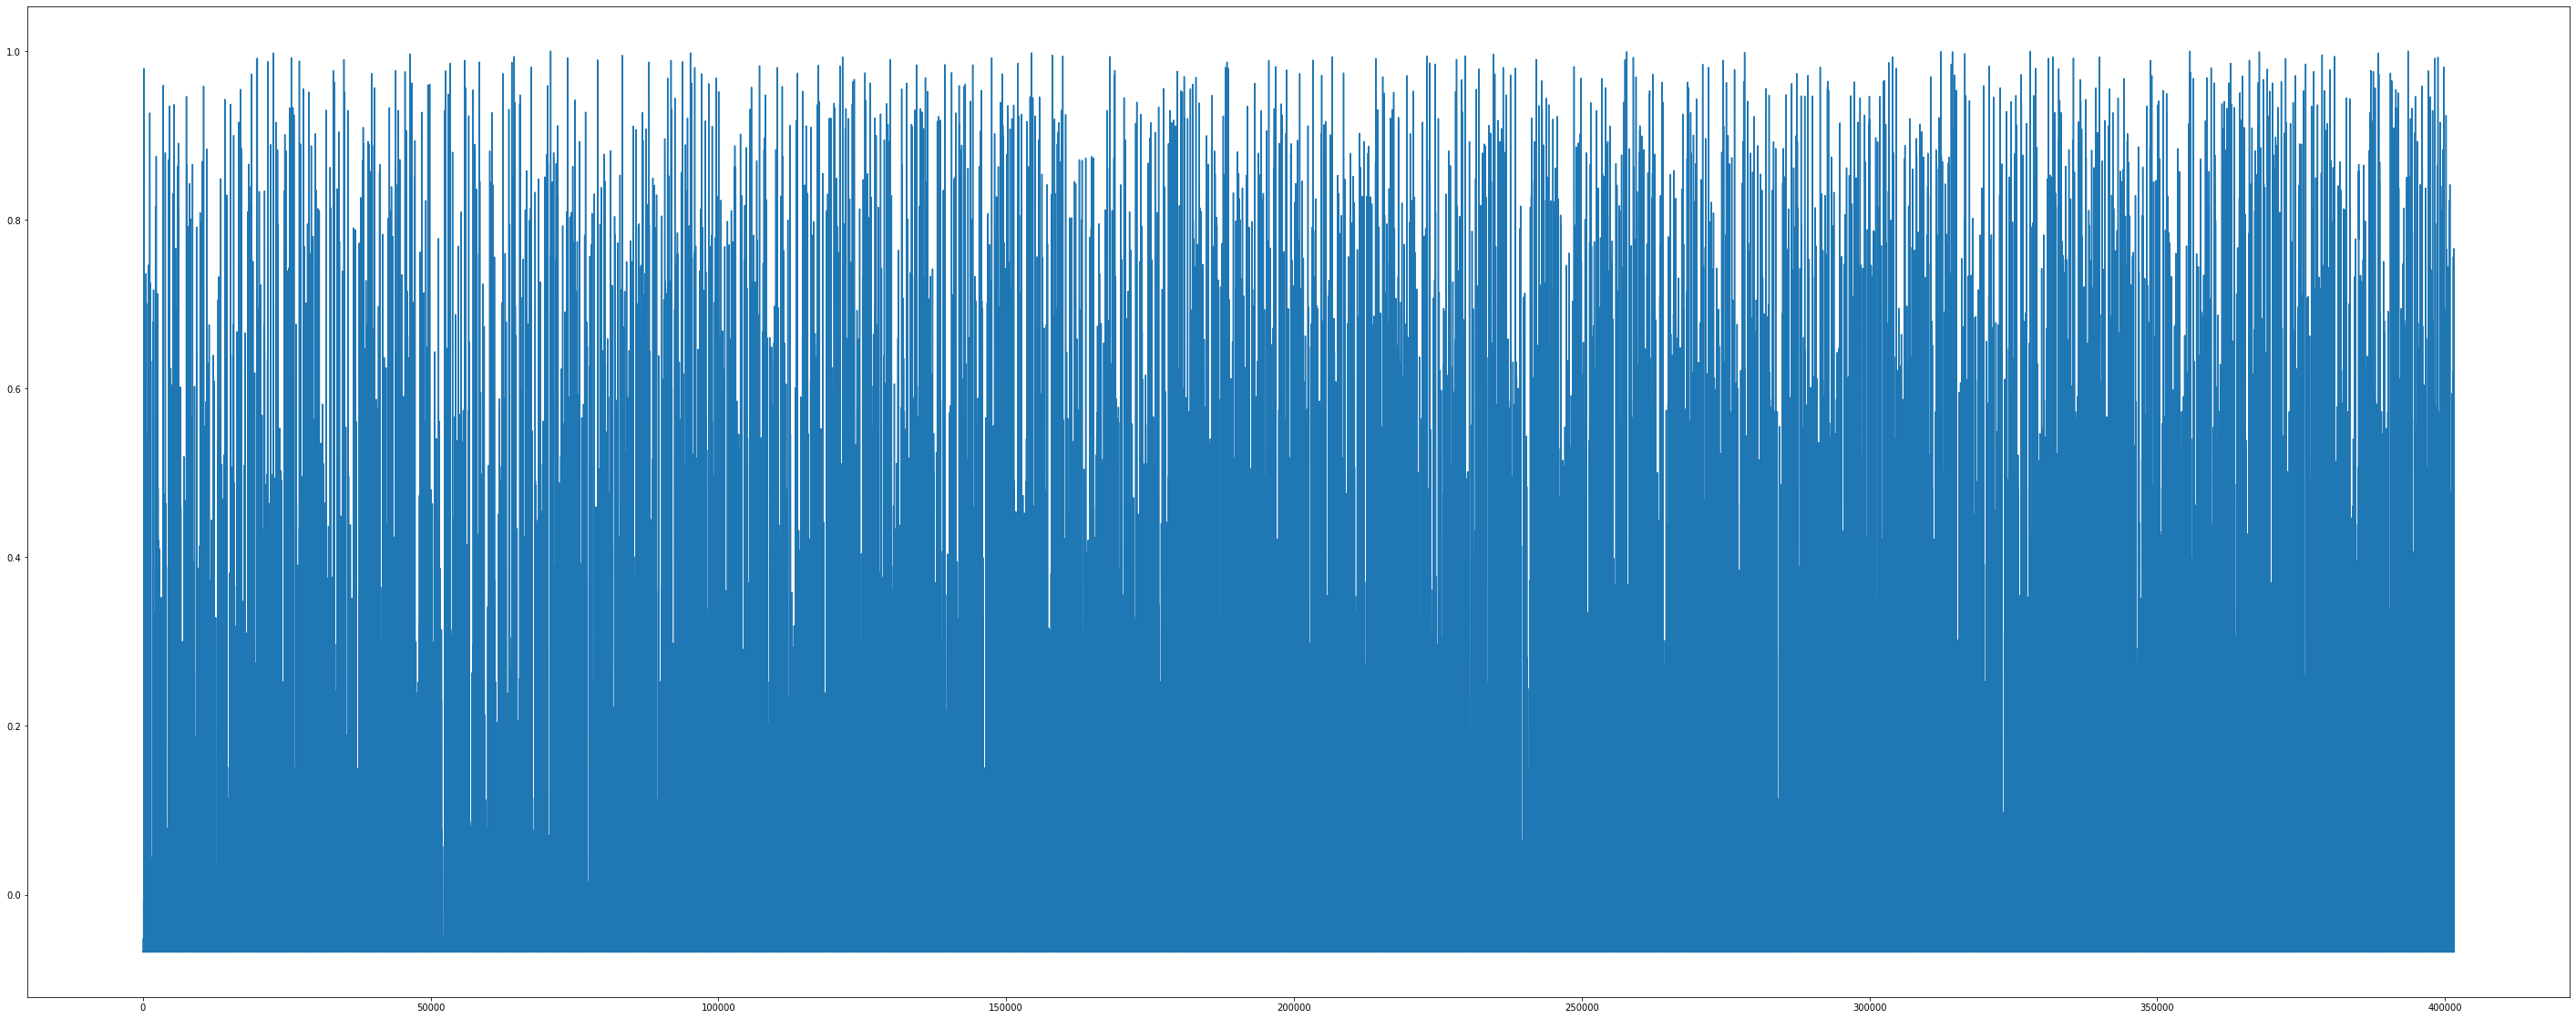

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot()
ax.plot([i for i in range(len(clean_losses))], clean_losses)
plt.show()

In [14]:
import random

def make_portfolios(df):
    df = df.fillna(0)
    with_claims = []
    no_claims = []
    for i, r in enumerate(df['Loss']):
        if r > 0.0:
            with_claims.append(i)
        else:
            no_claims.append(i)
            
    random.shuffle(with_claims)
    random.shuffle(no_claims)
    
    ratio = int(len(no_claims)/len(with_claims))
    per_portfolio = int(1000/ratio)
    
    possible_claims_portfolios = int(len(with_claims)/(per_portfolio))
    possible_noclaims_portfolios = int(len(no_claims)/(per_portfolio*ratio))
    
    num_portfolios = min(possible_claims_portfolios, possible_noclaims_portfolios)
    
    portfolios = []
    for i in range(num_portfolios):
        portfolio = []
        for j in range(per_portfolio):
            for k in range(ratio):
                portfolio.append(df.iloc[no_claims.pop()])
            portfolio.append(df.iloc[with_claims.pop()])
            random.shuffle(portfolio)
        portfolios.append(pd.DataFrame(portfolio, columns=df.columns))    
        
    return portfolios

In [ ]:
portfolios = make_portfolios(df_clean)

In [21]:
for i, p in enumerate(portfolios):
    p.to_csv('training_portfolios_op/portfolio_train_mean_' + str(i+1) + '.csv', index=False)

In [20]:
portfolios

[               0         1         2         3         4         5         6  \
 95887  -3.403167 -1.292035 -0.789578  0.515576 -1.204800 -0.888150  0.670938   
 278958  0.298939  0.593181  1.176190  0.087280 -1.167704 -3.928744  2.096601   
 189979  3.885486 -1.480254 -0.170330 -0.682902  3.457256 -1.060355 -0.492438   
 382158 -3.054659  0.327942  5.655517  1.904765  0.252161  0.627819  1.759283   
 162846  2.367002 -1.570428 -0.449134 -0.725295  1.204140  0.077317 -1.062693   
 ...          ...       ...       ...       ...       ...       ...       ...   
 269120  2.793818 -1.586553 -0.675857 -0.624894 -1.493291  0.794001 -0.360665   
 224810 -1.657786 -0.849149 -0.435438  1.552734 -1.210920 -1.948897  2.319310   
 134325  2.493861  5.122028 -3.289735  2.345800 -0.053166 -1.050149 -0.661290   
 198981  3.086949  0.879675 -0.456893 -1.716869 -0.477211 -0.480762 -0.568257   
 238531 -0.473267  0.779093  1.198524 -0.989817 -0.347339 -1.449375 -0.434449   
 
                7         

In [17]:
def mean_summarizer(df_t):
    sum = [0] * len(list(df_t.columns))
    for i, c in enumerate(df_t.columns):
        for j in range(len(df_t)):
            sum[i] += df_t[j:j+1][c].values[0]
    print('sum:', sum)
    values = [s / len(df_t) for s in sum]
    print('values:', values)
    n_df = pd.DataFrame([], columns=df_t.columns)
    return n_df.append(values, ignore_index=True)

def median_summarizer(df_t):
    values = df_t.median()
    n_df = pd.DataFrame([], columns=df_t.columns)
    return n_df.append(values, ignore_index=True)

def summarize_portfolios(portfolios, summarizer=median_summarizer, convert_to_lr=False):
    summarized_portfolios = []
    flag = True
    for p in portfolios:
        portfolio = summarizer(p)
        if convert_to_lr:
            portfolio['lr'] = np.log(portfolio['loss']/portfolio['premium'])
            portfolio = portfolio.drop(['loss', 'premium'], axis=1)
        if flag:
            cols = portfolio.columns
            flag = False
        summarized_portfolios.append(portfolio)
        
    if cols is None:
        return None
    n_df = pd.DataFrame([], columns=cols)
    for p in summarized_portfolios:
        n_df = n_df.append(p, ignore_index=True)
#     print(n_df)
    return n_df

In [18]:
training_set = summarize_portfolios(portfolios, convert_to_lr=True)

In [3]:
import glob


import warnings
warnings.filterwarnings('ignore')


def get_testing_portfolios(folder_name):
    path = 'testing_portfolios' # use your path
    all_files = glob.glob(path + "/*.csv")
    print(len(all_files))
    portfolios = []
    i = 0
    for filename in all_files:
        i += 1
        p = pd.read_csv(filename, index_col=None, header=0)
        print(len(p))
#       p = preprocess_data(p.dropna(), dropped_columns=['PolicyNo'], clean=True, remove_outliers=False,
#                             feature_transform=False, feature_selection=False)
#         portfolios.append(p)
    return summarize_portfolios(portfolios), portfolios

In [4]:
t_p, portfolios_test = get_testing_portfolios('testing_portfolios')

330
998
997
4967
4969
2989
4961
997
4971
997
2991
2989
2992
997
4969
2993
2986
4966
4976
2990
2986
2978
4975
999
1000
4949
4965
4967
2988
2990
4964
999
2991
2990
2989
2990
2994
2983
2981
998
998
4979
998
2988
2986
1000
998
998
4949
2988
2991
4975
998
4980
997
4972
4963
997
2992
1000
999
2978
999
2989
4977
2983
4967
1000
4958
997
4972
2990
1000
2996
1000
2990
2990
4970
2993
4971
998
2988
2990
2992
992
4967
4972
1000
999
1000
4972
4962
2989
2993
997
2993
998
2992
997
4957
1000
999
1000
2992
998
2987
2988
1000
1000
999
996
2985
2989
4977
4966
2984
1000
2986
998
4962
1000
4953
2991
4970
2990
997
2994
1000
2987
1000
4974
2991
4975
999
4973
4972
2992
2992
4961
2990
999
4980
4970
4970
998
4974
2988
999
999
4968
4977
2990
999
2979
2991
2986
999
4969
4976
4969
2992
999
4965
4973
1000
4965
4973
2991
4969
4973
4969
4971
998
4976
999
2992
998
1000
1000
998
2990
4964
998
4972
1000
996
4965
999
4978
2986
996
1000
4966
2984
4971
997
4971
4974
4965
999
2992
4970
999
999
4978
4976
4968
2986
997
2987
29

NameError: name 'summarize_portfolios' is not defined

In [13]:
losses = training_set['lr']

In [7]:
t_p

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.414944,-0.401407,-0.265624,-0.124719,-0.028044,-0.083550,-0.158313,-0.002917,-0.100046,-0.080138,...,-0.049312,-0.005731,-0.029512,0.027562,-0.005819,-0.016032,-0.070518,-0.014311,-0.018623,-0.005136
1,0.487281,-0.427202,-0.227646,-0.289672,-0.108197,0.137324,-0.182150,-0.076401,0.009355,-0.117482,...,0.027489,-0.029493,0.039106,0.019225,-0.021823,-0.035628,-0.019261,0.008190,-0.004036,-0.017728
2,-0.764856,-0.388887,-0.297678,-0.136241,-0.039880,-0.020247,-0.089759,0.029110,0.022874,0.048286,...,-0.048009,-0.008008,-0.008647,0.061704,-0.023749,-0.090960,-0.036835,0.006442,-0.021375,-0.015080
3,-0.671118,-0.402406,-0.342449,-0.094004,0.047924,0.186090,-0.199436,0.031336,-0.082590,-0.016839,...,-0.022279,-0.029803,0.000184,0.109790,-0.019660,-0.008944,-0.082079,-0.025928,-0.008555,-0.012714
4,0.701176,-0.449856,-0.306902,-0.097094,0.009950,-0.027272,-0.185329,-0.151105,-0.058593,0.042957,...,-0.059906,-0.032426,-0.009716,-0.022028,0.094023,0.028523,0.024843,-0.045993,-0.003079,-0.004708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.755276,-0.427589,-0.383243,-0.147800,-0.066962,-0.089151,-0.108452,-0.087742,0.053458,-0.100039,...,-0.057768,-0.010280,-0.006368,0.002792,-0.051459,-0.052675,-0.013649,-0.001782,-0.015124,0.009757
326,-0.654411,-0.458353,-0.297044,-0.085321,-0.013903,0.136406,-0.168727,-0.042320,0.001991,-0.032464,...,-0.028465,0.010046,0.016965,0.073534,-0.023466,0.066684,-0.030956,0.001838,-0.017317,-0.009271
327,-0.823369,-0.445005,-0.336589,-0.135137,-0.037924,0.034063,-0.104331,-0.020711,0.066416,-0.023780,...,-0.024440,-0.046957,0.028014,0.034059,0.030929,0.022818,-0.051193,-0.069132,0.004853,0.002907
328,0.611992,-0.424627,-0.207371,-0.191045,-0.035153,0.134631,-0.183199,-0.136768,0.081360,-0.020646,...,-0.040414,0.028515,0.005580,-0.022640,-0.010102,-0.093554,-0.084634,-0.022837,-0.001121,-0.023381


In [8]:
t_p.to_csv('testing_portfolios_50_median.csv')

In [113]:
losses = training_set['loss']

In [105]:
target

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
424426    0.0
424427    0.0
424428    0.0
424429    0.0
424430    0.0
Name: Loss_Amount, Length: 424431, dtype: float64

In [16]:
losses

0     -0.509866
1     -0.767435
2     -0.332697
3     -0.435303
4     -0.568037
         ...   
375   -0.528748
376    0.326807
377   -0.452011
378   -0.636387
379   -0.668743
Name: lr, Length: 380, dtype: float64

In [19]:
training_set = training_set.drop('loss', axis=1)

KeyError: "['loss'] not found in axis"

In [66]:
training_set.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,lr
0,0.045820,-0.020285,-0.015226,-0.062830,-0.018796,0.034479,0.018118,0.094114,-0.035645,-0.004526,...,-0.021984,-0.020453,-0.030111,0.001857,-0.016939,-0.019926,0.016573,-0.004606,-0.025052,-0.267850
1,-0.096302,-0.073871,0.035151,0.013443,0.018384,-0.002488,0.026751,0.062388,0.043064,0.006115,...,-0.004364,0.011072,-0.025138,0.003830,0.009453,0.000483,0.005076,0.018818,-0.009337,0.068119
2,0.092761,0.014158,-0.104313,0.065331,-0.019495,0.015939,0.003424,0.035930,0.001439,-0.079801,...,-0.006489,0.008243,0.017517,0.014213,-0.008493,0.002702,0.000361,-0.008383,0.005413,-0.132008
3,0.030194,0.054332,0.093700,-0.005694,-0.071258,-0.049923,-0.073917,-0.036221,-0.014920,-0.055291,...,0.027573,-0.008645,0.004515,-0.008427,-0.002162,0.015219,-0.035975,-0.010313,-0.002983,-0.889748
4,-0.049879,0.001356,0.009123,0.014031,-0.039893,-0.007393,-0.071035,-0.003236,-0.036142,0.039501,...,0.035389,-0.011426,-0.013334,0.017107,-0.005062,-0.004436,0.010203,0.010488,0.016233,-0.549267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,-0.001596,-0.040101,0.080140,-0.012026,-0.063427,-0.026669,-0.027291,-0.031374,-0.008782,0.022597,...,-0.024257,-0.012641,-0.030281,0.023459,0.020780,-0.008386,0.029011,0.004334,-0.007542,-0.613396
376,0.012653,0.049698,-0.005468,0.119562,-0.065616,-0.029432,-0.037375,0.002307,-0.037038,0.067878,...,0.001760,-0.011138,-0.007607,-0.011013,-0.023249,-0.017781,0.004699,0.021436,0.011687,-0.638014
377,-0.004336,-0.004941,0.019250,-0.063091,-0.000476,0.036834,-0.004787,-0.030743,0.035096,-0.072835,...,-0.043566,0.006221,-0.009899,0.003891,-0.009120,0.006499,0.032341,-0.001717,0.007835,-0.786031
378,-0.057355,0.060139,-0.024047,-0.003037,-0.000843,-0.023928,-0.028059,0.026748,0.011407,-0.001720,...,-0.020103,0.022246,0.042424,-0.006472,0.023433,0.012819,-0.016901,0.004041,-0.004789,-0.624572


In [20]:
training_set.drop('lr', axis=1).to_csv('training_50_median.csv', index=False)

In [69]:
losses

0     -0.267850
1      0.068119
2     -0.132008
3     -0.889748
4     -0.549267
         ...   
375   -0.613396
376   -0.638014
377   -0.786031
378   -0.624572
379   -0.789295
Name: lr, Length: 380, dtype: float64

In [70]:
losses = training_set['lr']
losses.to_csv('training_loss_50_ratios.csv', index=False, header=False)

In [124]:
df_clean

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,loss
0,0.822511,-3.197911,-3.683301,0.685306,-0.345284,1.083684,-0.362420,1.615885,0.571659,-0.318568,...,0.164241,-0.173110,0.059358,0.681950,-0.015497,0.202153,-1.738823,0.126884,0.167264,0.0
1,-2.367808,-3.625519,-3.769293,2.885057,-1.727100,2.069011,-2.432538,-1.353834,6.598667,2.288432,...,0.172229,-0.206500,0.871788,-0.469211,-1.653286,-0.300808,-2.636556,2.168907,0.057289,0.0
2,0.955761,-3.940034,-3.658091,1.559538,1.220638,2.289073,-1.632745,1.447898,2.440878,-0.465305,...,-0.088670,-0.547785,-2.422177,0.457459,2.474113,1.891349,0.569253,-2.981146,0.466576,0.0
3,1.100196,-3.617575,-2.599305,1.138038,0.308002,3.214747,-2.430302,-1.194018,0.817247,-1.260229,...,-0.094377,-0.151103,-1.033110,-0.588894,1.709334,-0.797130,0.470101,-1.846555,1.864802,0.0
4,1.085183,-3.670813,-2.632366,1.162059,0.307024,3.232055,-2.441274,-1.180598,0.828931,-1.280191,...,-0.094397,-0.151596,-1.033970,-0.602443,1.711226,-0.805447,0.461692,-1.848466,1.877393,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407100,2.198992,6.174036,-1.849284,0.507613,1.200152,1.030194,0.066078,-0.778142,-0.621469,0.776300,...,0.260143,-0.111771,0.747712,-2.254769,0.512560,0.755710,-1.282370,-0.216729,-0.416225,0.0
407101,4.085266,0.511354,0.851459,-2.138276,4.629585,1.396822,6.593259,-1.886976,2.365411,-1.683856,...,-0.019167,-0.167312,-0.332209,0.172868,1.184639,-0.612740,0.332569,0.274275,-1.084096,0.0
407102,-0.783451,6.658742,-2.402172,2.054218,-0.406915,-1.430170,0.817435,-0.200958,0.341388,1.381247,...,-0.082776,0.109984,0.608705,-0.915793,-1.100528,-0.139049,-0.429336,-0.239407,-2.483183,0.0
407103,0.209536,-1.043600,-0.581526,-0.583789,1.830679,-0.378196,1.548151,0.957460,-2.732321,1.565845,...,0.081812,-0.292641,-1.164162,-1.867922,2.249329,1.614157,0.853153,-1.518733,-1.524806,0.0


In [20]:
from sklearn.linear_model import LinearRegression
X = pd.read_csv('training_median.csv', index=False)
reg = LinearRegression().fit(X, losses)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.013194,0.063571,0.088012,0.009799,0.021530,0.060274,0.074977,0.028069,-0.054494,-0.025556,...,-0.030094,-0.013276,-0.022436,0.011691,-0.006522,0.022634,-0.037710,-0.004630,-0.000122,0.025122
1,-0.001657,-0.016529,-0.001698,-0.023342,0.031382,0.010239,0.024535,-0.043607,0.003146,0.068984,...,-0.087160,-0.021568,-0.001560,-0.065198,-0.006465,-0.025500,-0.003053,-0.007712,-0.033729,0.041375
2,-0.168495,-0.056902,0.037373,-0.039389,0.003843,0.020237,0.032745,0.013362,-0.019529,-0.056134,...,-0.000458,-0.005160,-0.016093,0.023833,0.009690,-0.034927,0.029056,0.011031,-0.032125,0.004241
3,0.065422,-0.112453,0.023047,-0.075998,-0.061645,-0.026318,-0.003452,-0.015500,-0.029477,-0.008439,...,0.019828,-0.006161,-0.013677,-0.010045,-0.014879,-0.039260,0.060832,0.029565,-0.018894,-0.006463
4,0.079353,-0.078708,0.052352,0.020750,0.040520,0.006239,0.004638,-0.070893,-0.005416,-0.045614,...,-0.000284,-0.008746,-0.017978,-0.023423,-0.005638,-0.003815,0.021324,-0.006199,0.013405,-0.029775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.074270,0.025524,-0.004397,-0.037993,0.007221,0.010578,0.023441,0.044455,-0.026937,-0.074626,...,0.004513,-0.008247,-0.021883,0.032083,0.048526,-0.063318,-0.025847,0.017867,-0.031623,0.008319
376,0.102476,-0.005623,-0.051868,0.098793,-0.005386,-0.023201,-0.009690,0.040823,-0.035976,-0.012860,...,-0.010727,0.044215,0.002330,-0.003159,0.000519,-0.020201,-0.049859,-0.040714,-0.029183,-0.004049
377,-0.038408,0.094132,0.052616,0.029553,0.086855,0.043294,-0.040265,0.036500,-0.002072,-0.046976,...,-0.008539,-0.009608,-0.017151,-0.020038,0.037361,-0.041571,0.004421,0.019487,-0.010844,0.046185
378,-0.011267,-0.069999,0.032222,-0.031614,-0.054038,0.000026,0.075849,-0.007304,0.059886,0.057291,...,-0.047949,0.056129,0.006769,0.043736,0.039515,-0.021966,0.004106,0.023296,0.016896,-0.009466


In [22]:
reg.score(X, losses)

0.0612799283492892

In [26]:
reg.predict(X)

array([-0.44513726, -0.50251806, -0.27290356, -0.47367025, -0.45830999,
       -0.45300557, -0.28228123, -0.3749926 , -0.46197278, -0.32352304,
       -0.33454921, -0.49079099, -0.29755865, -0.45825602, -0.34218058,
       -0.33090566, -0.45927534, -0.49494554, -0.40834421, -0.33014576,
       -0.43924518, -0.40736567, -0.31734305, -0.30808717, -0.25406564,
       -0.13088226, -0.44102477, -0.53109903, -0.37245684, -0.42934862,
       -0.40851232, -0.47388445, -0.35339001, -0.50898469, -0.45493776,
       -0.37621079, -0.3495192 , -0.19162937, -0.35744313, -0.48979294,
       -0.40768777, -0.35863786, -0.40838566, -0.55179176, -0.49282487,
       -0.52230278, -0.39244902, -0.3710549 , -0.52541381, -0.37462589,
       -0.53982485, -0.50350087, -0.42415267, -0.28203195, -0.25489556,
       -0.47053966, -0.48248748, -0.37935066, -0.22498919, -0.46979966,
       -0.58388129, -0.08762152, -0.47618866, -0.47786175, -0.38271526,
       -0.48726736, -0.36782289, -0.43093281, -0.3707852 , -0.23

In [27]:
losses

0     -0.447475
1     -0.708914
2     -0.669580
3     -0.655944
4     -0.632838
         ...   
375    0.606037
376    0.249668
377   -0.269027
378   -0.071285
379   -0.854080
Name: lr, Length: 380, dtype: float64

In [28]:
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.013194,0.063571,0.088012,0.009799,0.021530,0.060274,0.074977,0.028069,-0.054494,-0.025556,...,-0.030094,-0.013276,-0.022436,0.011691,-0.006522,0.022634,-0.037710,-0.004630,-0.000122,0.025122
1,-0.001657,-0.016529,-0.001698,-0.023342,0.031382,0.010239,0.024535,-0.043607,0.003146,0.068984,...,-0.087160,-0.021568,-0.001560,-0.065198,-0.006465,-0.025500,-0.003053,-0.007712,-0.033729,0.041375
2,-0.168495,-0.056902,0.037373,-0.039389,0.003843,0.020237,0.032745,0.013362,-0.019529,-0.056134,...,-0.000458,-0.005160,-0.016093,0.023833,0.009690,-0.034927,0.029056,0.011031,-0.032125,0.004241
3,0.065422,-0.112453,0.023047,-0.075998,-0.061645,-0.026318,-0.003452,-0.015500,-0.029477,-0.008439,...,0.019828,-0.006161,-0.013677,-0.010045,-0.014879,-0.039260,0.060832,0.029565,-0.018894,-0.006463
4,0.079353,-0.078708,0.052352,0.020750,0.040520,0.006239,0.004638,-0.070893,-0.005416,-0.045614,...,-0.000284,-0.008746,-0.017978,-0.023423,-0.005638,-0.003815,0.021324,-0.006199,0.013405,-0.029775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.074270,0.025524,-0.004397,-0.037993,0.007221,0.010578,0.023441,0.044455,-0.026937,-0.074626,...,0.004513,-0.008247,-0.021883,0.032083,0.048526,-0.063318,-0.025847,0.017867,-0.031623,0.008319
376,0.102476,-0.005623,-0.051868,0.098793,-0.005386,-0.023201,-0.009690,0.040823,-0.035976,-0.012860,...,-0.010727,0.044215,0.002330,-0.003159,0.000519,-0.020201,-0.049859,-0.040714,-0.029183,-0.004049
377,-0.038408,0.094132,0.052616,0.029553,0.086855,0.043294,-0.040265,0.036500,-0.002072,-0.046976,...,-0.008539,-0.009608,-0.017151,-0.020038,0.037361,-0.041571,0.004421,0.019487,-0.010844,0.046185
378,-0.011267,-0.069999,0.032222,-0.031614,-0.054038,0.000026,0.075849,-0.007304,0.059886,0.057291,...,-0.047949,0.056129,0.006769,0.043736,0.039515,-0.021966,0.004106,0.023296,0.016896,-0.009466


In [32]:
T = pd.read_csv('testing_portfolios_median.csv')
T = T.drop(T.columns[0], axis=1)
T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.414944,-0.401407,-0.265623,-0.124719,-0.027988,-0.083522,-0.158461,-0.002962,-0.100082,-0.079790,...,-0.060503,-0.007134,-0.044819,-0.132437,-0.003314,0.021405,0.031614,-0.026372,-0.004882,-0.029343
1,0.487281,-0.427202,-0.227643,-0.289671,-0.108187,0.137409,-0.182159,-0.076565,0.009362,-0.117430,...,-0.009839,-0.078557,-0.008140,0.029593,0.008215,0.037188,0.089943,-0.041670,-0.042328,-0.037412
2,-0.764856,-0.388884,-0.297688,-0.136240,-0.040044,-0.020258,-0.089545,0.028512,0.022879,0.048552,...,-0.003791,-0.033162,0.001787,-0.088309,-0.014585,0.033484,-0.028766,0.019207,-0.054666,-0.001369
3,-0.671117,-0.402407,-0.342447,-0.094016,0.048151,0.186040,-0.199537,0.031048,-0.083252,-0.016426,...,0.009672,0.009754,0.027996,-0.090663,-0.062254,-0.011017,-0.015657,-0.020701,-0.030709,0.025244
4,0.701175,-0.449857,-0.306889,-0.097079,0.009964,-0.026817,-0.185084,-0.151040,-0.058367,0.042697,...,0.028657,-0.018686,0.003478,-0.079171,0.059253,-0.145750,0.026741,0.034051,0.042729,0.000450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.755276,-0.427588,-0.383248,-0.147788,-0.066962,-0.089155,-0.108481,-0.087863,0.053564,-0.100000,...,-0.089448,0.058053,0.069615,-0.083665,-0.012232,-0.028937,0.043440,0.019957,-0.049998,-0.020238
326,-0.654412,-0.458353,-0.296997,-0.085277,-0.013907,0.136378,-0.168647,-0.042308,0.001937,-0.033238,...,-0.003761,-0.077820,-0.031796,0.051043,-0.154347,0.001892,0.011314,-0.012502,-0.035646,-0.034492
327,-0.823368,-0.445005,-0.336572,-0.135162,-0.038062,0.034224,-0.104783,-0.020929,0.066877,-0.022600,...,-0.068450,-0.003380,-0.009735,0.037699,0.017754,-0.039506,0.020415,0.030796,-0.048259,-0.034015
328,0.611993,-0.424621,-0.207412,-0.191026,-0.035120,0.134583,-0.183118,-0.136972,0.081381,-0.020794,...,-0.109460,0.038521,0.011730,-0.109632,0.027563,0.096030,0.011691,0.013061,-0.035390,-0.047618


In [35]:
predictions = reg.predict(T)

In [38]:
output = []
for i in range(len(predictions)):
    id_val = 'portfolio_' + str(i+1)
    pred = predictions[i]
    output.append((id_val, pred))
output

[('portfolio_1', -0.49879348224783115),
 ('portfolio_2', -0.2030330625591823),
 ('portfolio_3', -0.28303874954135166),
 ('portfolio_4', -0.30272431774326203),
 ('portfolio_5', -0.68615963724777),
 ('portfolio_6', -0.07890805697627185),
 ('portfolio_7', -0.5324123688105366),
 ('portfolio_8', -0.5887253231644359),
 ('portfolio_9', -0.24353800865584516),
 ('portfolio_10', -0.6250811735350893),
 ('portfolio_11', 0.12680386698204693),
 ('portfolio_12', 0.011853569473855907),
 ('portfolio_13', 0.09265479306118513),
 ('portfolio_14', -0.6180135181979137),
 ('portfolio_15', -0.04116852377018354),
 ('portfolio_16', 0.15910797163113866),
 ('portfolio_17', 0.006486118994324108),
 ('portfolio_18', -0.27349243939518864),
 ('portfolio_19', 0.02393073980446503),
 ('portfolio_20', -0.794213937525527),
 ('portfolio_21', 0.19985442630566963),
 ('portfolio_22', 0.11550794975526568),
 ('portfolio_23', -0.21723216795098269),
 ('portfolio_24', 0.09830843388313848),
 ('portfolio_25', -0.39414973662307595),
 

In [40]:
op_pd = pd.DataFrame(output, columns=['ID','ln_LR'])

In [43]:
op_pd

,ID,ln_LR
0,portfolio_1,-0.498793
1,portfolio_2,-0.203033
2,portfolio_3,-0.283039
3,portfolio_4,-0.302724
4,portfolio_5,-0.686160
...,...,...
325,portfolio_326,-0.528591
326,portfolio_327,0.164213
327,portfolio_328,0.205070
328,portfolio_329,-0.815784


In [42]:
op_pd.to_csv('linear_regression_out.csv', index=False)

In [63]:
import glob
path = 'testing_portfolios' # use your path
all_files = glob.glob(path + "/*.csv")
files = []
for f in all_files:
    t = f[24:]
    t = t[:-4]
    files.append(t)
def sort_file(item):
    return int(item.split('_')[1])
files = sorted(files, key=sort_file)
files

['portfolio_1',
 'portfolio_2',
 'portfolio_3',
 'portfolio_4',
 'portfolio_5',
 'portfolio_6',
 'portfolio_7',
 'portfolio_8',
 'portfolio_9',
 'portfolio_10',
 'portfolio_11',
 'portfolio_12',
 'portfolio_13',
 'portfolio_14',
 'portfolio_15',
 'portfolio_16',
 'portfolio_17',
 'portfolio_18',
 'portfolio_19',
 'portfolio_20',
 'portfolio_21',
 'portfolio_22',
 'portfolio_23',
 'portfolio_24',
 'portfolio_25',
 'portfolio_26',
 'portfolio_27',
 'portfolio_28',
 'portfolio_29',
 'portfolio_30',
 'portfolio_41',
 'portfolio_42',
 'portfolio_43',
 'portfolio_44',
 'portfolio_45',
 'portfolio_46',
 'portfolio_47',
 'portfolio_48',
 'portfolio_49',
 'portfolio_50',
 'portfolio_51',
 'portfolio_52',
 'portfolio_53',
 'portfolio_54',
 'portfolio_55',
 'portfolio_56',
 'portfolio_57',
 'portfolio_58',
 'portfolio_59',
 'portfolio_60',
 'portfolio_61',
 'portfolio_62',
 'portfolio_63',
 'portfolio_64',
 'portfolio_65',
 'portfolio_66',
 'portfolio_67',
 'portfolio_68',
 'portfolio_69',
 'port

In [64]:
output = []
for i in range(len(predictions)):
    pred = predictions[i]
    output.append((files[i], pred))
output

[('portfolio_1', -0.49879348224783115),
 ('portfolio_2', -0.2030330625591823),
 ('portfolio_3', -0.28303874954135166),
 ('portfolio_4', -0.30272431774326203),
 ('portfolio_5', -0.68615963724777),
 ('portfolio_6', -0.07890805697627185),
 ('portfolio_7', -0.5324123688105366),
 ('portfolio_8', -0.5887253231644359),
 ('portfolio_9', -0.24353800865584516),
 ('portfolio_10', -0.6250811735350893),
 ('portfolio_11', 0.12680386698204693),
 ('portfolio_12', 0.011853569473855907),
 ('portfolio_13', 0.09265479306118513),
 ('portfolio_14', -0.6180135181979137),
 ('portfolio_15', -0.04116852377018354),
 ('portfolio_16', 0.15910797163113866),
 ('portfolio_17', 0.006486118994324108),
 ('portfolio_18', -0.27349243939518864),
 ('portfolio_19', 0.02393073980446503),
 ('portfolio_20', -0.794213937525527),
 ('portfolio_21', 0.19985442630566963),
 ('portfolio_22', 0.11550794975526568),
 ('portfolio_23', -0.21723216795098269),
 ('portfolio_24', 0.09830843388313848),
 ('portfolio_25', -0.39414973662307595),
 

In [65]:
op_pd = pd.DataFrame(output, columns=['ID','ln_LR'])
op_pd.to_csv('linear_regression_out.csv', index=False)
op_pd

,ID,ln_LR
0,portfolio_1,-0.498793
1,portfolio_2,-0.203033
2,portfolio_3,-0.283039
3,portfolio_4,-0.302724
4,portfolio_5,-0.686160
...,...,...
325,portfolio_596,-0.528591
326,portfolio_597,0.164213
327,portfolio_598,0.205070
328,portfolio_599,-0.815784


In [61]:
portfolios_test

[           0         1         2         3         4         5         6   \
 0    0.403269 -2.985185 -1.094311  2.563854  2.320869 -0.662708 -1.131709   
 1   -2.854562 -2.973373 -3.864673  2.223251 -1.883854  0.444855 -0.144108   
 2   -3.913421 -0.738749 -1.251118  1.047246 -1.086290 -0.537934 -0.459921   
 3   -1.699875  0.362530 -0.116297 -0.271495 -0.263014 -2.259742  0.443554   
 4   -1.778027 -2.371042 -2.869633  1.596129 -0.228409  1.120285 -1.750273   
 ..        ...       ...       ...       ...       ...       ...       ...   
 956  2.276922  0.264458  0.051210 -3.157830  1.095349  1.636183 -1.636467   
 957 -2.290181  1.651154  1.969540 -2.928288  1.343167  0.487305 -0.209393   
 958 -2.881181  1.560747 -0.873319 -1.282483 -2.052432  1.219852  0.582144   
 959 -3.446327  2.162698  1.203926 -3.047852 -0.028675  1.826747  0.436808   
 960 -0.150406 -0.091220  0.637160  0.049141 -1.983536 -0.479336  1.656332   
 
            7         8         9   ...        40        41   

In [29]:
import keras

ModuleNotFoundError: No module named 'keras'

In [68]:
gen = [p for p in list(portfolios_test[0][3])]

In [69]:
sum = 0
# for p, g in zip(portfolios[0][0], gen):
#     print(p, g)
for g in gen:
    sum += g
print(g)

0.04914051973147396
